In [1]:
import pandas as pd 
import numpy as np
import prepare , explore
#to see the whole review, display max column width
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("colorblind")
sns.set_style('darkgrid')

# Rate My Review
## An Analysis on Hotel reviews in Texas
#### Xavier Carter, September 2021

----

#### The Dataset
- Using Selinium, 13,800 reviews were gathered from various hotels across 4 major cities in Texas (Houston, Austin, Dallas, San Antonio)

#### Project Goals
- Analyze reviews to understand correlation to the review rating and the review. 
- Build a machine learning model to predict what rating a review should get.

#### Executive Summary
- Executive Summary here

----

## Acquire
- Utilizing Selinium (see acquire1.py and acquire2.py) , Gathering review information from TripAdvisor.com
- For sake of time, the max number of reviews looked at for each hotel was maxed to 35, as some hotels had hundreds of reviews

In [2]:
df = pd.read_csv('hotel_data.csv')

In [3]:
df.head(2)

,hotel_name,hotel_city,date_of_stay,review_rating,review
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2021,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,September 2020,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hotel_name     13801 non-null  object
 1   hotel_city     13801 non-null  object
 2   date_of_stay   13801 non-null  object
 3   review_rating  13801 non-null  int64 
 4   review         13801 non-null  object
dtypes: int64(1), object(4)
memory usage: 539.2+ KB


In [5]:
df.isna().sum()

hotel_name       0
hotel_city       0
date_of_stay     0
review_rating    0
review           0
dtype: int64

In [6]:
df.describe()

,review_rating
count,13801.000000
mean,3.622564
std,1.559053
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------------')

Fairmont Austin                                             70
La Cantera Resort & Spa                                     70
Super 8 by Wyndham Austin North/University Area             35
Hampton Inn Austin-North at I-35 and Hwy 183                35
La Quinta Inn & Suites by Wyndham Austin Near the Domain    35
                                                            ..
Grand Inn                                                    1
Palomino Motel & Trailer Park                                1
Hampton Inn & Suites Dallas I-30 Cockrell Hill               1
NATIONAL AT 2929 WYCLIFF                                     1
Terra Cotta Inn                                              1
Name: hotel_name, Length: 548, dtype: int64
---------------------------
Austin         4033
San Antonio    3633
Houston        3574
Dallas         2561
Name: hotel_city, dtype: int64
---------------------------
 August 2021      1356
 July 2021        1215
 February 2020     696
 June 2021         696
 May

#### Acquire Findings 

#### TO-Do's:
1). The cap for reviews was 35, each review being unique, since value counts of 70 and 2 were seen, duplicates exist in the data. duplicates need to be removed.

2). Month and year can be in their own seperate columns.

3.) no null values or missing values. 

4.) Standardize english words using NLP processing, Standard cleaning using NLTK.

----

## Prepare
- In Preperation, we will
     * Drop Duplicates
     * Split month and year into seperate columns 
     * Drop date of stay column
     * Prep review content (Basic cleaning, tokenizing, lemmentizing, removing stop words, excluding common negative stop words)
     * Makeing columns for word and letter count
     * creating columns for negative , postive and neautral sentiment from cleaned version of the review (post clean, tokenize , lemmatized, and stop words removed, keeping popular negative stop words as negative stops words have the power to change the meaning of the review)
     * create bins for sentiment columns for exploration

In [8]:
df = prepare.prep_review_data(df)

In [9]:
df.head(3)

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
0,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,Joseph was so helpful and attentive! Awesome customer service. Made our trip more enjoyable! This will now be our go to hotel when we come to San Antonio. Everything about the hotel was nice and the staff was very friendly. Very pleased with the whole experience.,September,2021,joseph helpful attentive ! awesome customer service. made trip enjoyable ! go hotel come san antonio. everything hotel nice staff friendly. pleased whole experience .,166,25,0.547,0.000,0.453
1,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"We stayed one night at the Drury Plaza Riverwalk in mid-September. Sooo enjoyed our stay. Definitely our favorite hotel on the Riverwalk. We specifically stayed here for the rooms with the balconies overlooking the San Fernando Cathedral. I sat on that balcony all day long, reading and enjoying the view, even despite the day of rain! Love the separate bedroom! The afternoon happy hour could have easily sufficed for dinner had the allure of the Riverwalk restaurants not been there. The indoor pool/hot tub was nice, and the fitness center was perfectly equipped with great views while running the treadmill. The breakfast was hearty and very good quality...love that they have biscuits and gravy! Every employee we encountered was upbeat and kind and seemed to be interested in serving",September,2020,"stayed one night drury plaza riverwalk mid-september. sooo enjoyed stay. definitely favorite hotel riverwalk. specifically stayed room balcony overlooking san fernando cathedral. sat balcony day long , reading enjoying view , even despite day rain ! love separate bedroom ! afternoon happy hour could easily sufficed dinner allure riverwalk restaurant not there. indoor pool/hot tub nice , fitness center perfectly equipped great view running treadmill. breakfast hearty good qualitylove biscuit gravy ! every employee encountered upbeat kind seemed interested serving",568,80,0.396,0.032,0.572
2,Drury Plaza Hotel San Antonio Riverwalk,San Antonio,5,"On a very busy weekend, I had the pleasure of experiencing, Excellent customer service and very friendly Felt I made the right choice staying here Johnny and ZOE made me feel special And they were busy",September,2021,"busy weekend , pleasure experiencing , excellent customer service friendly felt made right choice staying johnny zoe made feel special busy",139,21,0.470,0.000,0.530


----

## Outliers 
- Here , we'll take a look at possible anomolies
     * looking at positive sentiment reviews with low ratings
     * looking at negative sentiment reviews with high ratings

In [10]:
postive_when_neg  = (df.positive_sentiment  >= .450) & (df.review_rating == 1)
negative_when_pos = (df.negative_sentiment  >= .450) & (df.review_rating == 5)

In [11]:
df[postive_when_neg].sample(3)

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
8552,Hotel ZaZa Memorial City,Houston,1,I tried to book a birthday party at the hotel. The hotel party coordinator made written discriminatory comments to me and she refused to put the amount that I had agreed to pay for the party event in the party contract which resulted in me having to call my family and friends and cancel the party.,March,2021,tried book birthday party hotel. hotel party coordinator made written discriminatory comment refused put amount agreed pay party event party contract resulted call family friend cancel party .,192,28,0.454,0.135,0.411
12130,Best Western Plus Northwest Inn & Suites,Houston,1,The place smelled. The ac struggled to cool. The lobby needed better air flow. The pool is still not open. The Togo breakfast is a joke. The workers are the best assets this location has going for it.,June,2021,place smelled. ac struggled cool. lobby needed better air flow. pool still not open. togo breakfast joke. worker best asset location ha going .,143,24,0.503,0.069,0.429
5125,Comfort Suites NW Lakeline,Austin,1,"All around good place to stay whatever you reason for travel to Austin, easy access to major roads that take you all around town and back to your comfortable room. Nice breakfast and competent staff that is responsive to your needs.",March,2019,"around good place stay whatever reason travel austin , easy access major road take around town back comfortable room. nice breakfast competent staff responsive need .",166,26,0.481,0.000,0.519


In [12]:
df[negative_when_pos]

,hotel_name,hotel_city,review_rating,review,month_of_stay,year_of_stay,review_cleaned,message_length,word_count,positive_sentiment,negative_sentiment,neatral_sentiment
13793,Econo Lodge Inn & Suites,Dallas,5,"Service of staff was a little bad and rude, In the lobby the didn't have the uniform. And the location is not good, is very dangerous.",March,2014,"service staff little bad rude , lobby ' uniform. location not good , dangerous .",80,15,0.141,0.526,0.332


#### Most of these may be miss clicked, as these people may wanted to rate higher or lower then their sentiment may suggest. so we will remove these from the dataframe as outliers so our model isnt trained in a way that might skew the results.

In [13]:
df = prepare.remove_outliers(df)

In [14]:
len(df)

13717

### Split Model 

In [15]:
train, validate, test = prepare.split_for_model(df,'review_rating')

(7681, 12),(3292, 12),(2744, 12)


## Explore

### univariate 

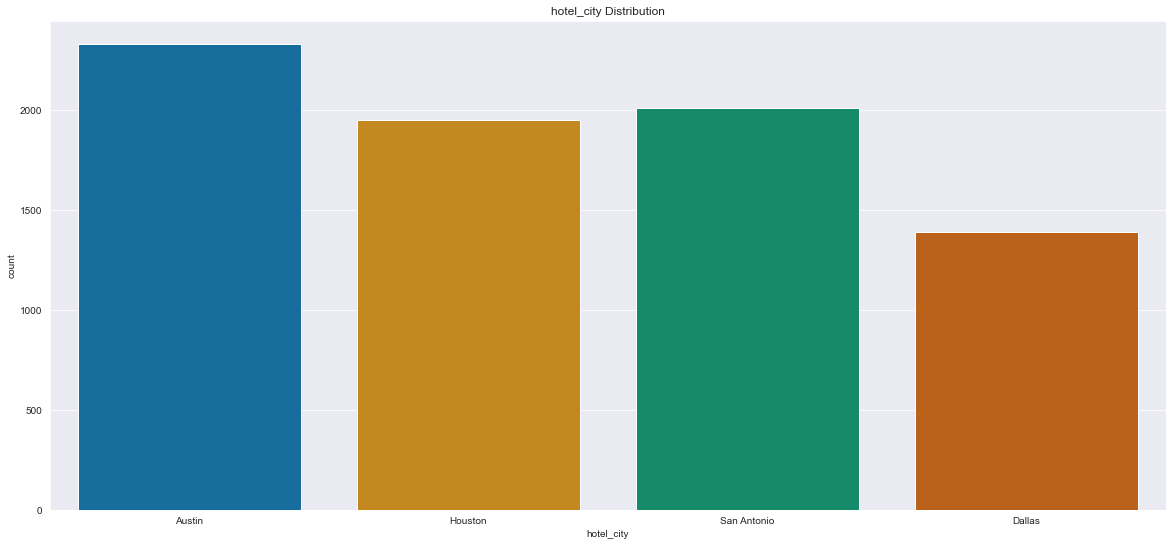

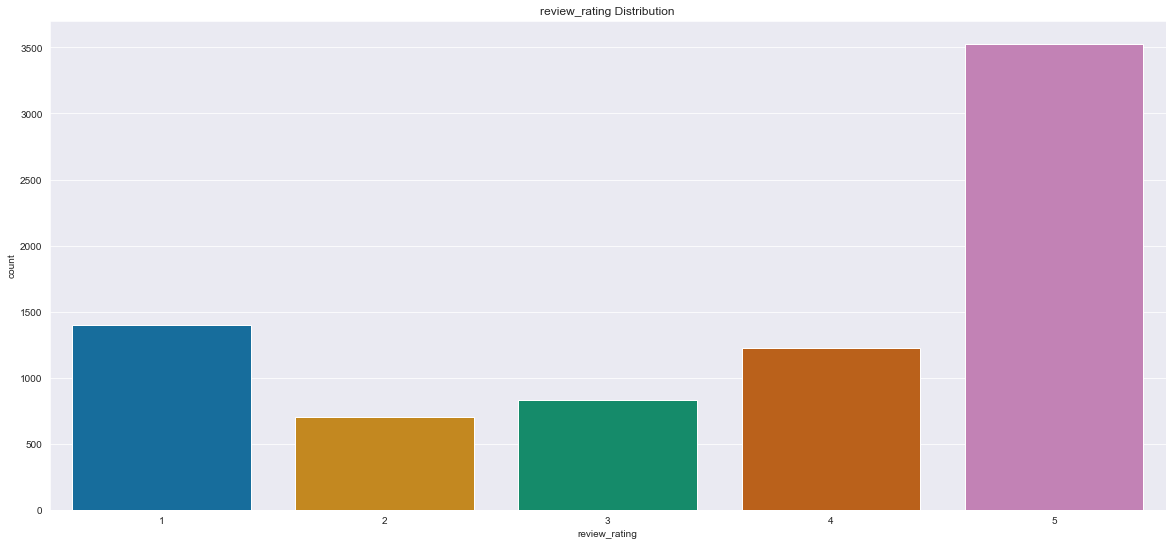

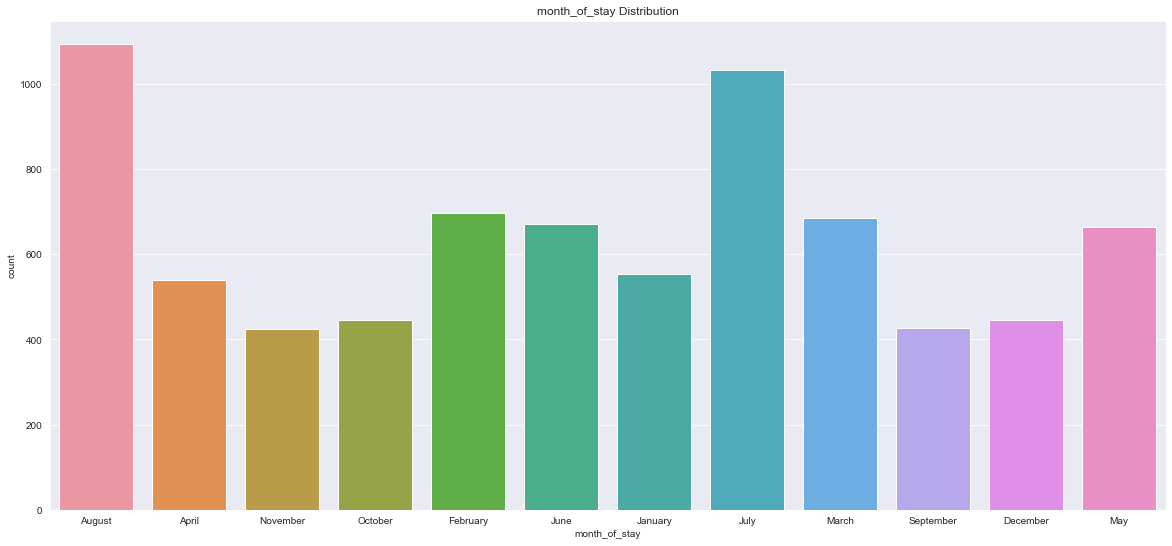

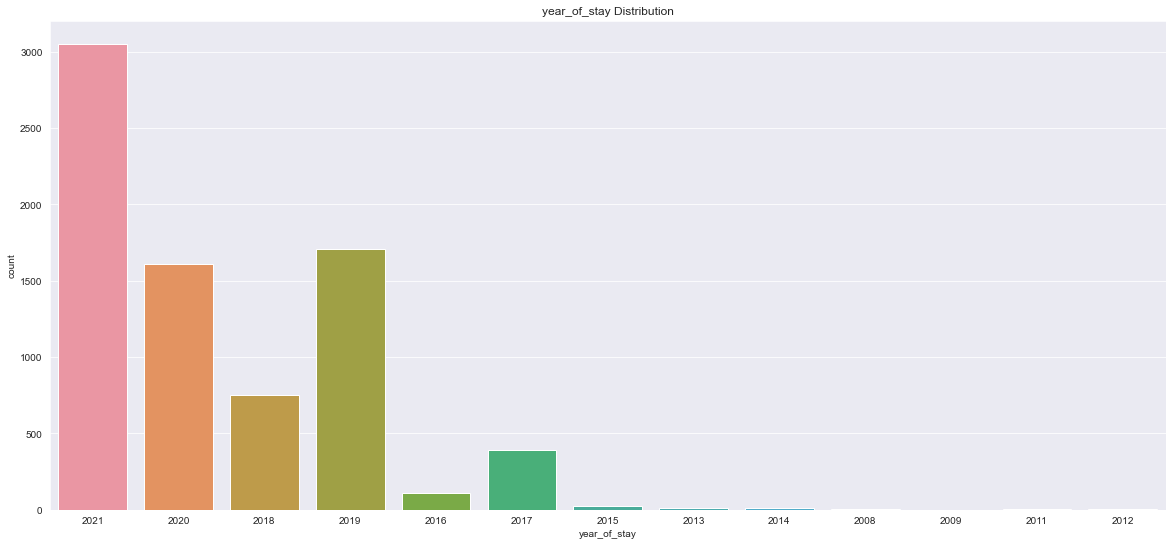

In [16]:
explore.get_distribution(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','message_length', 'word_count']))

### Bivariate

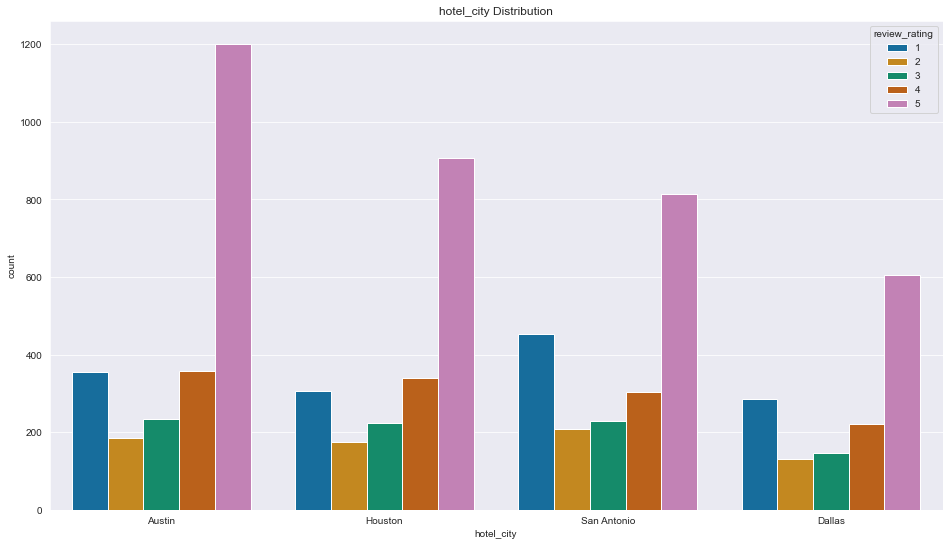

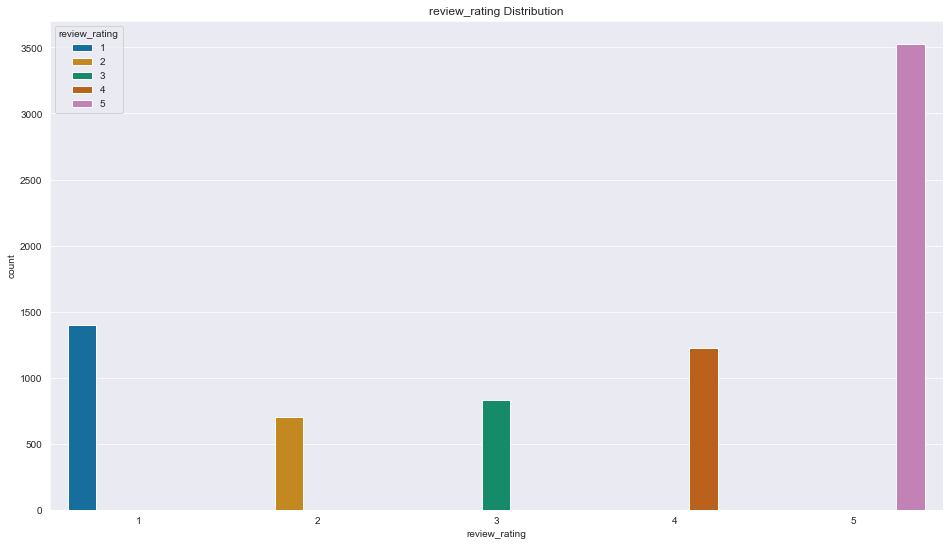

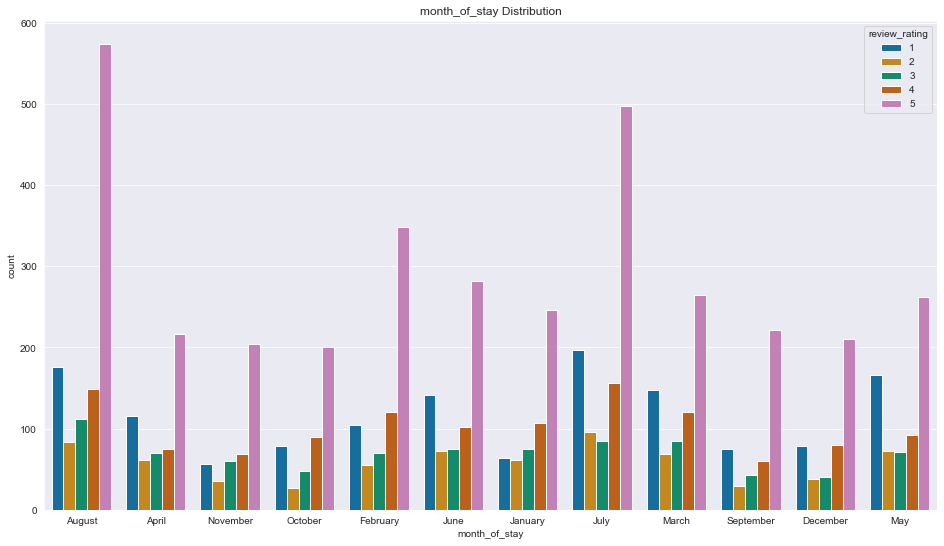

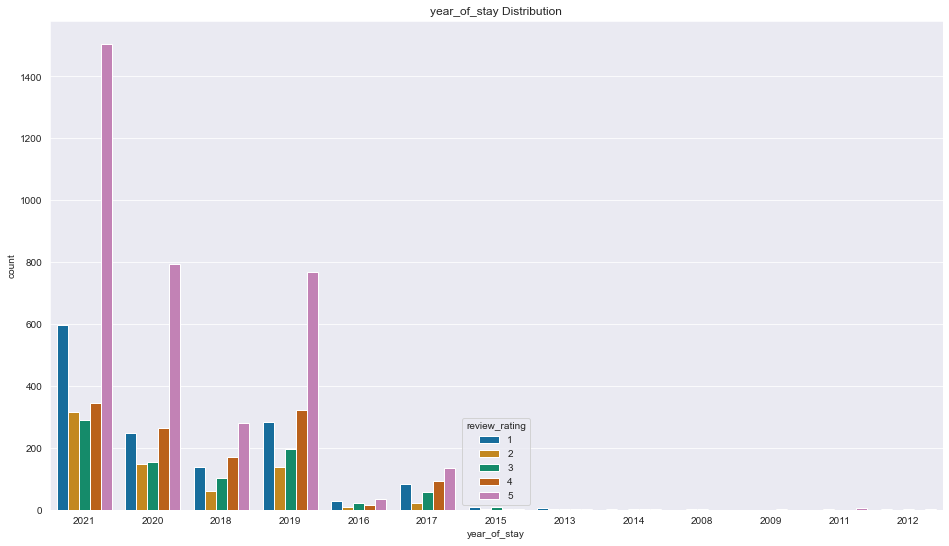

In [17]:
explore.compare_to_target(train.drop(columns=['hotel_name','review', 'review_cleaned','positive_sentiment','negative_sentiment', 'neatral_sentiment','word_count', 'message_length']), 'review_rating')

### Does word count and message length differ for different review ratings?

Text(0, 0.5, 'word_count')

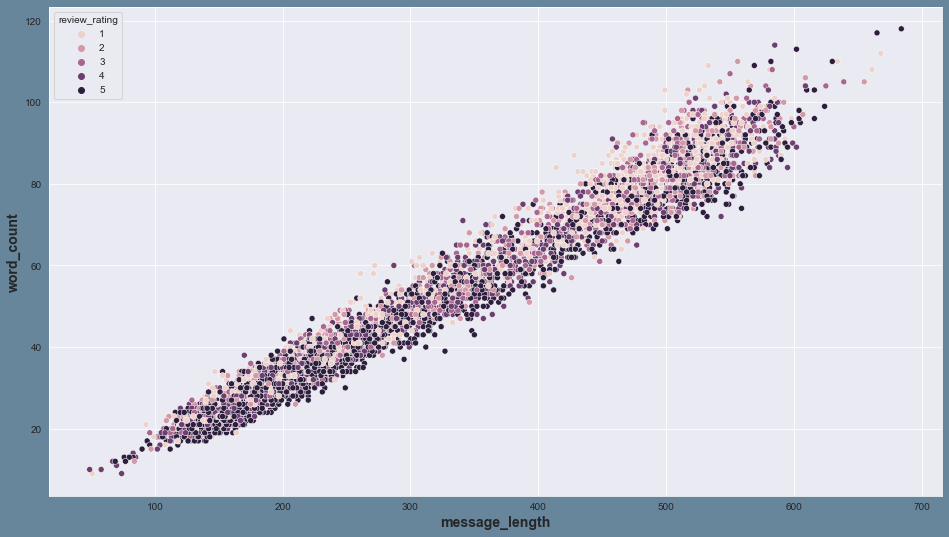

In [36]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
sns.scatterplot(data = train, x = 'message_length', y ='word_count', hue='review_rating')
plt.xlabel('message_length',fontweight='bold', fontsize=14)
plt.ylabel('word_count',fontweight='bold', fontsize=14) 

### Average Message length for each review score?

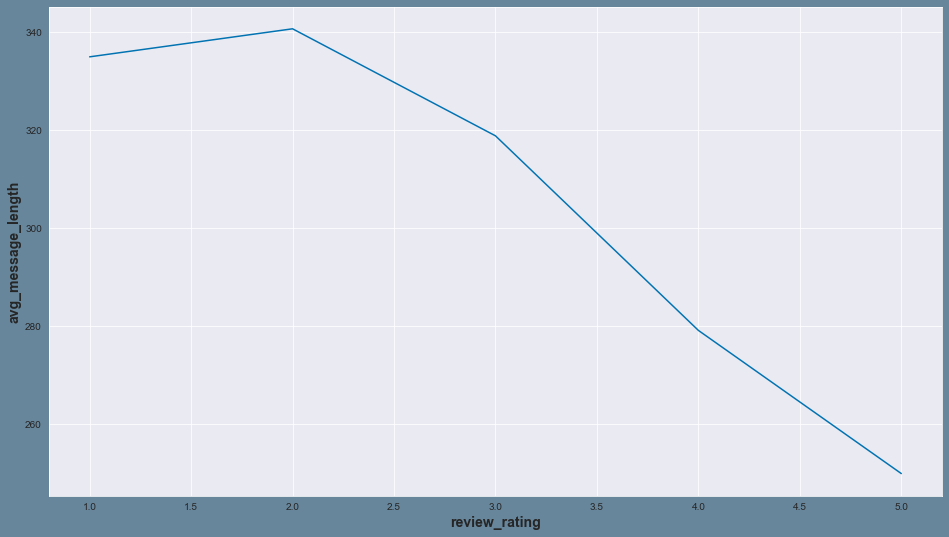

In [34]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_message_length =("message_length", 'mean'))
group = group.reset_index()
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('avg_message_length',fontweight='bold', fontsize=14) 
sns.lineplot(data=group, x = 'review_rating', y = 'avg_message_length')
plt.show()

### Average Word Count for each review score?

In [ ]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_word_count =("word_count", 'mean'))
group = group.reset_index()
sns.lineplot(data=group, x = 'review_rating', y = 'avg_word_count')
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('avg_word_count',fontweight='bold', fontsize=14) 
plt.show()

### Average rating for each city?

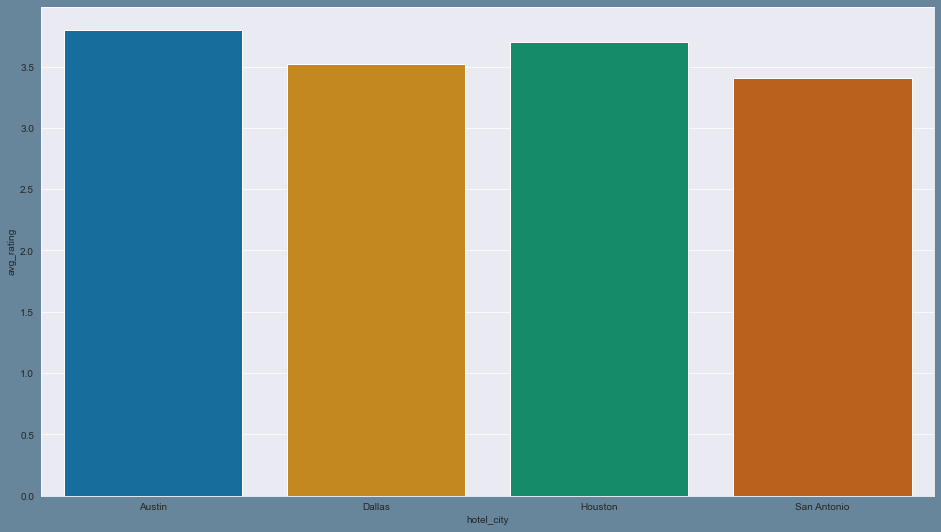

In [40]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['hotel_city']).agg(avg_rating =("review_rating", 'mean'))
group = group.reset_index()
sns.barplot(data=group, x = 'hotel_city', y = 'avg_rating')
plt.show()

### Average Rating for each month? 

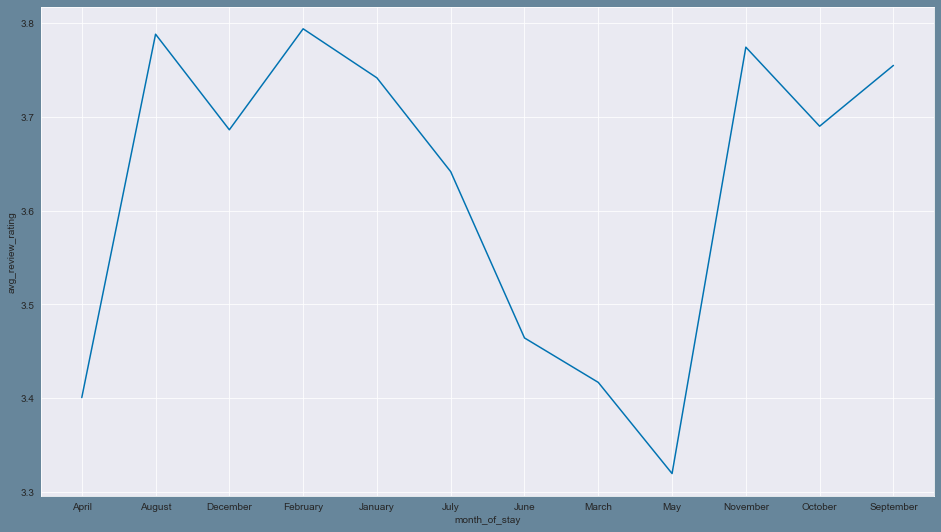

In [41]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['month_of_stay']).agg(avg_review_rating =("review_rating", 'mean'))
group = group.reset_index()
sns.lineplot(data=group, x = 'month_of_stay', y = 'avg_review_rating')
plt.show()

### Average Sentiment for each review rating?

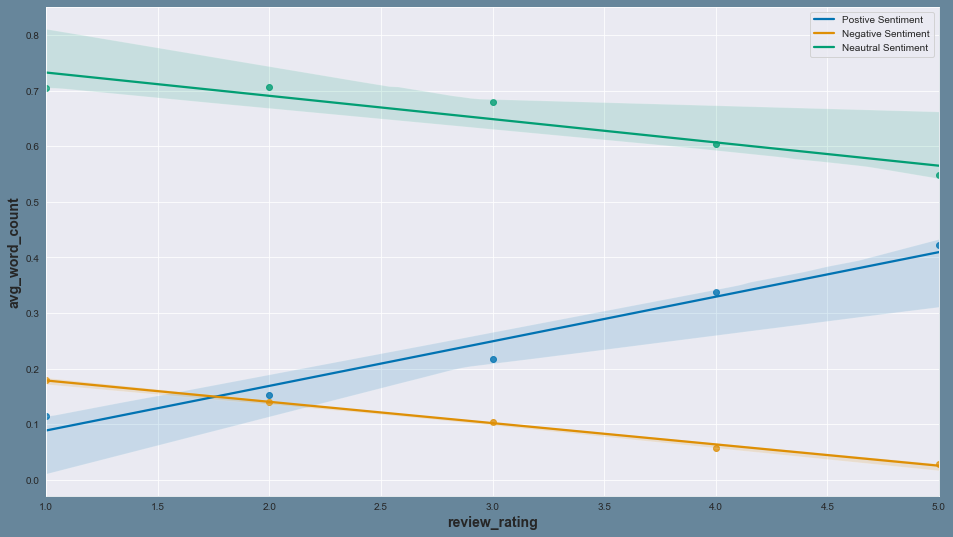

In [76]:
plt.figure(figsize=(16,9),facecolor='#67869b') 
group = train.groupby(['review_rating']).agg(avg_pos_sent =("positive_sentiment", 'mean'), avg_neg_sent =('negative_sentiment', 'mean'), avg_neu_sent =('neatral_sentiment', 'mean'))
group = group.reset_index()
sns.regplot(data=group, x = 'review_rating', y = 'avg_pos_sent')
sns.regplot(data=group, x = 'review_rating', y = 'avg_neg_sent')
sns.regplot(data=group, x = 'review_rating', y = 'avg_neu_sent')
plt.xlabel('review_rating',fontweight='bold', fontsize=14)
plt.ylabel('avg_word_count',fontweight='bold', fontsize=14) 
plt.legend(labels=['Postive Sentiment','Negative Sentiment','Neautral Sentiment'])
plt.show()

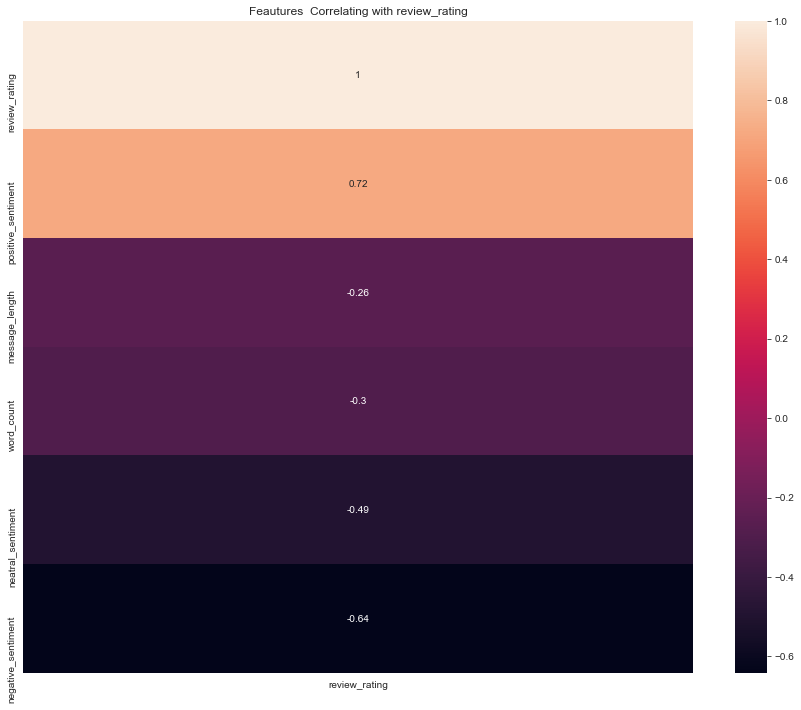

<AxesSubplot:title={'center':'Feautures  Correlating with review_rating'}>

In [71]:
explore.get_heatmap(train, 'review_rating')

#### Takeaways 